In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import numpy as np
import pandas as pd
pd.set_option("display.max.columns", None)
pd.set_option("display.max_colwidth", None)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("ggplot")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import (LinearRegression, 
                                  Ridge, 
                                  Lasso)
from sklearn.metrics import (r2_score, 
                             mean_absolute_error, 
                             mean_squared_error)

In [2]:
data=pd.read_csv("energydata_complete (3).csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [4]:
data.shape

(19735, 29)

In [5]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [6]:
data.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [7]:
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [8]:
simple_linear_reg_data_subset=data[['T2','T6']].sample(15,random_state=2)

<AxesSubplot:xlabel='T2', ylabel='T6'>

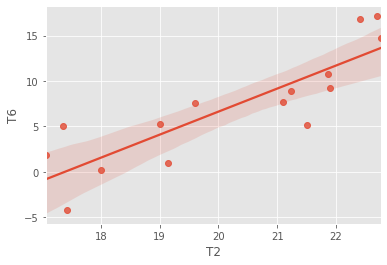

In [9]:
sns.regplot(x="T2",y="T6",data=simple_linear_reg_data_subset)

In [10]:
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(data.drop(columns=['date', 'lights'])), 
                             columns=data.drop(columns=['date', 'lights']).columns)
features_df = normalised_df.drop(columns=['Appliances'])
energy_target = normalised_df.Appliances
X_train, X_test, y_train, y_test = train_test_split(features_df, energy_target, test_size=.3, random_state=42)

From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6). What is the R^2 value in two d.p.?

In [11]:
lin_reg = LinearRegression()
lin_reg.fit(X_train[['T2']], X_train.T6)
T6_pred = lin_reg.predict(X_test[['T2']])
print(f'r^2 score: {round(r2_score(X_test.T6, T6_pred), 2)}')

r^2 score: 0.64


Normalize the dataset using the MinMaxScaler after removing the following columns: [“date”, “lights”]. The target variable is “Appliances”. Use a 70-30 train-test set split with a random state of 42 (for reproducibility). Run a multiple linear regression using the training set and evaluate your model on the test set. Answer the following questions:

What is the Mean Absolute Error (in two decimal places)?

In [12]:
print(f'MAE: {round(mean_absolute_error(X_test.T6, T6_pred), 2)}')


MAE: 0.08


What is the Residual Sum of Squares (in two decimal places)?

In [13]:
print(f'Residual Sum of Squares: {round(np.sum(np.square(X_test.T6 - T6_pred)), 2)}')


Residual Sum of Squares: 66.12


What is the Root Mean Squared Error (in three decimal places)?

In [14]:
print(f'Root Mean Squared Error: {round(np.sqrt(mean_squared_error(X_test.T6, T6_pred)), 3)}')


Root Mean Squared Error: 0.106


Obtain the feature weights from your linear model above. Which features have the lowest and highest weights respectively?

Train a ridge regression model with an alpha value of 0.4. Is there any change to the root mean squared error (RMSE) when evaluated on the test set?

In [15]:
def get_weights_df(model, feat, col_name):
    #this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

In [16]:
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.4)

In [17]:
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.001)

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
linear_model_weights = get_weights_df(model, X_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, X_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, X_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

Train a lasso regression model with an alpha value of 0.001 and obtain the new feature weights with it. How many of the features have non-zero feature weights?

In [20]:
final_weights.sort_values("Linear_Model_Weight", ascending=False)


,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
25,RH_1,0.553547,0.519525,0.017880
24,T3,0.290627,0.288087,0.000000
23,T6,0.236425,0.217292,0.000000
22,Tdewpoint,0.117758,0.083128,0.000000
21,T8,0.101995,0.101028,0.000000
20,RH_3,0.096048,0.095135,0.000000
19,RH_6,0.038049,0.035519,-0.000000
18,Windspeed,0.029183,0.030268,0.002912
17,T4,0.028981,0.027384,-0.000000
16,RH_4,0.026386,0.024579,0.000000


In [21]:
y_pred_lg = model.predict(X_test)
y_pred_r = ridge_reg.predict(X_test)
y_pred_l = lasso_reg.predict(X_test)

In [22]:
print(f'Root Mean Squared Error: {round(np.sqrt(mean_squared_error(y_test, y_pred_r)), 3)}')


Root Mean Squared Error: 0.088


What is the new RMSE with the lasso regression? (Answer should be in three (3) decimal places)

In [23]:
print(f'Root Mean Squared Error: {round(np.sqrt(mean_squared_error(y_test, y_pred_l)), 3)}')

Root Mean Squared Error: 0.094
